#**<font color='green'>CS105 Final Project</font>**

#####Team 8: Jackson Marolt, Alex Back, Alex Ha, Kota Sawada, Navjot Brar

# **Project Proposal:**

Our project’s objective is to create a music recommendation system that suggests a song based on the user’s inputted song. We will use different aspects of songs such as genre, Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence,Tempo, Duration, Likes, Stream, EnergyLiveness. These are also the features in our dataset.

# **Features:**

> Artist

> Track

> Album

> Album_type

> Danceability

> Energy

> Loudness

> Speechiness

> Acousticness

> Instrumentalness

> Liveness

> Valence

> Tempo

> Duration_min

> Title

> Channel

> Views

> Likes

> Comments

> Licensed

> official_video

> Stream

> EnergyLiveness

> most_playedon

# **Dataset:**

[Dataset Link](https://www.gigasheet.com/sample-data/spotify-dataset)

# **Contributions:**

**Jackson Marolt:**

> Worked on the majority of the presentation slides, and normalized the dataset. Also created the tests.

**Alex Back:**

> Normalized the dataset, worked on the KNN algorithm to find songs with features that resembled the sample song. Worked on some visualizations and a little of the presentation slides.

**Alex Ha**

> Created visualizations for the KNN algorithm, and worked on the presentation slides.

**Koda Sawada:**

> Worked on the K-Means clustering algorithm, created the Radar chart, Heat map, and Elbow Method chart

**Navjot Brar:**

> Worked on the KNN algorithm to find songs with features that resembled the sample song. Worked on the presentation slides. Worked on some
visualizations.

# **Techniques:**
* Data Preprocessing
    * Normalize features by scaling audio features to values between 0 and 1. Scaling helps improve performance as it prevents features from having more weight than others.
* We could use the KNN algorithm
Supervised Algorithm.
    * Will use Euclidean distance formula to calculate the distance between the inputted song and the other songs in the dataset. It will then recommend the nearest neighboring song.
* Use K-Means to cluster songs
    * Unsupervised algorithm. Find the optimal number of clusters for 20,000 songs and its audio features.
* Content-Based filtering
    * We can analyze the features of each song and filter songs that have similar features that we can recommend to a user.


In [ ]:
import pandas as pd

#header = 1 is used because the headers were the first row of the csv file
df = pd.read_csv("final_proj.csv")
pd.set_option('display.max_columns', None)
df.head()



,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,True,True,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,True,True,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,True,True,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,True,True,617259738,9.942693,Youtube


# **Normalizing the data:**

Here, we normalize the data on a scale from 0 to 1, where 0 represents the lowest value and 1 represents the largest value. We do this to not allow some columns to gain weight just by being on average larger than another column. Previously, the tempo column saw values into the hundreds, now it has been put on a scale from zero to one.
* Of course, this only applies to some of the columns. Columns like the duration of the song can keep their true values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Tempo', 'EnergyLiveness']

scaler = MinMaxScaler()

df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df_normalized

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.838974,0.705,0.838905,0.183610,0.008394,0.002330,0.6130,0.7720,0.569330,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854,0.019455,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.693333,0.703,0.857222,0.031328,0.087249,0.000687,0.0463,0.8520,0.381149,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,True,True,310083733,0.256853,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.712821,0.923,0.897183,0.054149,0.042671,0.046900,0.1160,0.5510,0.443823,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,True,True,63063467,0.134603,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.706667,0.739,0.857328,0.026971,0.000015,0.509000,0.0640,0.5780,0.494810,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,True,True,434663559,0.195333,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.680000,0.694,0.797609,0.177386,0.025402,0.000000,0.0698,0.5250,0.690108,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,True,True,617259738,0.168195,Youtube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20589,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.596923,0.926,0.846007,0.034025,0.449799,0.000000,0.0839,0.6580,0.369812,1.577783,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678,1113,0,True,True,9227144,0.186706,Spotify
20590,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.544615,0.936,0.942634,0.142116,0.028112,0.000000,0.0923,0.6570,0.718526,2.514283,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741,2019,0,True,True,10898176,0.171547,Spotify
20591,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.454359,0.830,0.881304,0.067116,0.024398,0.000000,0.1540,0.4190,0.691896,2.280700,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646,329,0,True,True,6226110,0.091173,Spotify
20592,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.427692,0.767,0.895614,0.434647,0.357430,0.018400,0.1080,0.5390,0.638438,1.806450,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533,88,0,True,True,6873961,0.120138,Spotify


# **EDA:**

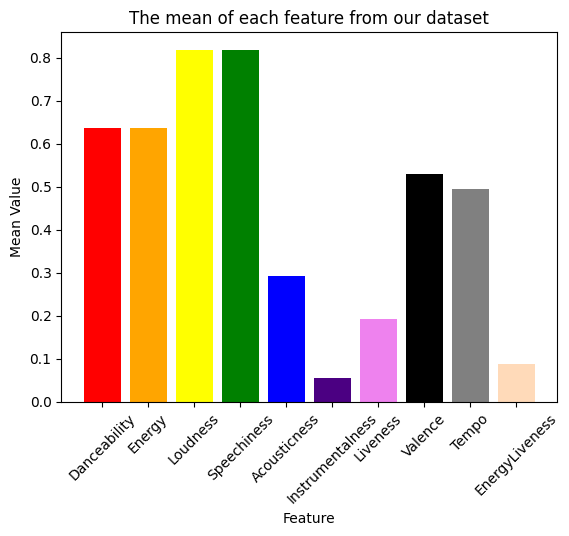

In [ ]:
import matplotlib.pyplot as plt
import warnings

mean_danceability = df_normalized['Danceability'].mean()
mean_energy = df_normalized['Energy'].mean()
mean_loudness = df_normalized['Loudness'].mean()
mean_speechiness = df_normalized['Loudness'].mean()
mean_acousticness = df_normalized['Acousticness'].mean()
mean_instrumentalness = df_normalized['Instrumentalness'].mean()
mean_liveness = df_normalized['Liveness'].mean()
mean_valence = df_normalized['Valence'].mean()
mean_tempo = df_normalized['Tempo'].mean()
mean_energyLivenesss = df_normalized['EnergyLiveness'].mean()

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'black', 'gray', 'peachpuff']

plt.bar(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'EnergyLiveness'],
        [mean_danceability, mean_energy, mean_loudness, mean_speechiness, mean_acousticness, mean_instrumentalness, mean_liveness, mean_valence, mean_tempo, mean_energyLivenesss], color = colors)

plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.title('The mean of each feature from our dataset')
plt.xticks(rotation = 45)

plt.show()

This chart is just to show the mean value for all our features. It seems that most of the songs in our dataset have relatively high Danceability, Energy, Loudness, and Speechiness while lacking in songs that have high instrumentals.

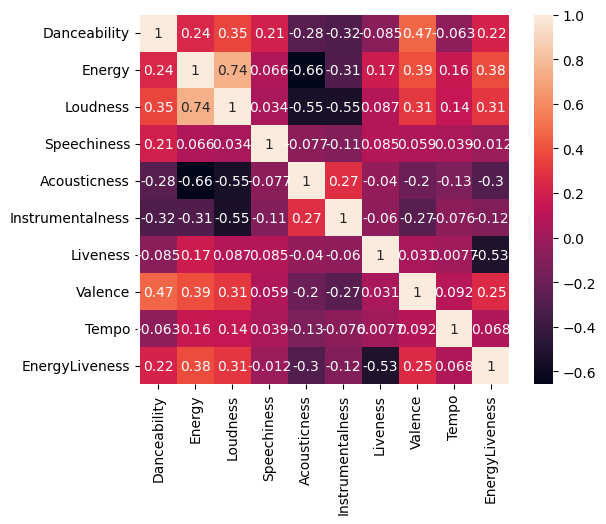

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'EnergyLiveness']
df_audio_features = df_normalized.loc[:, audio_features]
df_audio_features

sb.heatmap(df_audio_features.corr(), annot=True, square=True)
plt.show()

The heat map above shows the correlation between each audio feature. We can see that Loudness and Energy has the highest positive correlation of 0.74 and Acousticness and Energy has the highest negative correlation of -0.55.

# **KNN Algorithm:**

In [ ]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = df_normalized[audio_features]
y = df_normalized['Track']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

#print(classification_report(y_test, predictions, zero_division=1))

In [ ]:
from sklearn.neighbors import NearestNeighbors

music_numerical = df_normalized[audio_features]

sample_artist = 'Gorillaz'
sample_track = 'Clint Eastwood'

sample_song_data = df_normalized[(df_normalized['Artist'] == sample_artist) & (df_normalized['Track'] == sample_track)]

if not sample_song_data.empty:
    sample_song_features = sample_song_data[audio_features].values

    k = 11
    knn_model = NearestNeighbors(n_neighbors=k)
    knn_model.fit(music_numerical)

    distances, indices = knn_model.kneighbors(sample_song_features)

    similar_songs = df_normalized.iloc[indices[0]]
    print(similar_songs)

                         Artist                                         Track  \
4                      Gorillaz                                Clint Eastwood   
19974       TOMORROW X TOGETHER  PS5 (with TOMORROW X TOGETHER & Alan Walker)   
16580               Alan Walker  PS5 (with TOMORROW X TOGETHER & Alan Walker)   
7519   Mindless Self Indulgence                                        Faggot   
8294                 Jelly Roll                                  Same Asshole   
7997                       Akon                         Sorry, Blame It On Me   
18013                Lil Yachty                                 sAy sOMETHINg   
8350              Travis Barker              In My Head (feat. Travis Barker)   
19796                  24kGoldn              In My Head (feat. Travis Barker)   
14244         Yo Yo Honey Singh                                 Dheere Dheere   
13995             Playboi Carti                                        R.I.P.   

                           

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


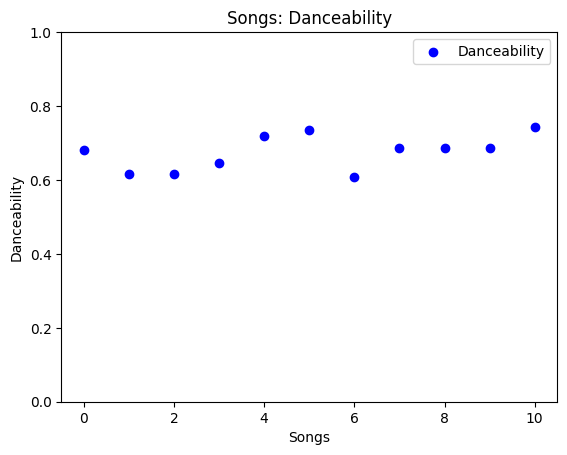

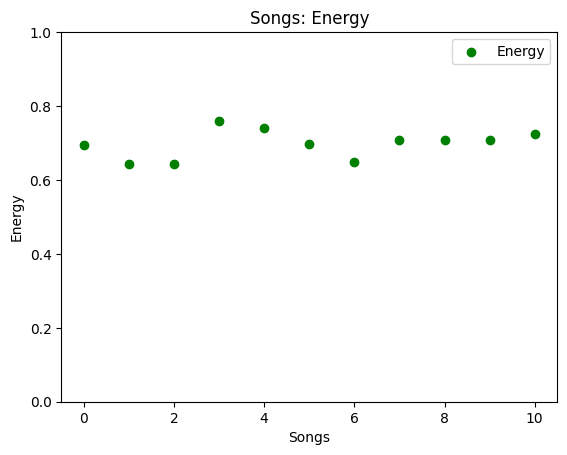

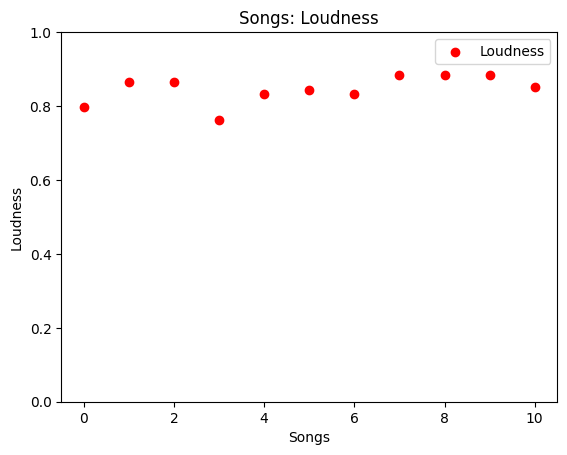

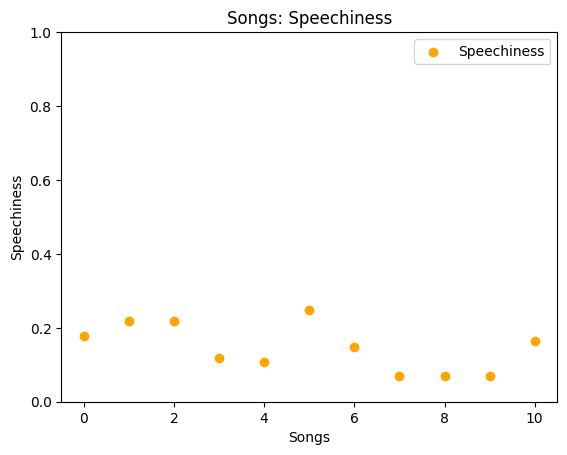

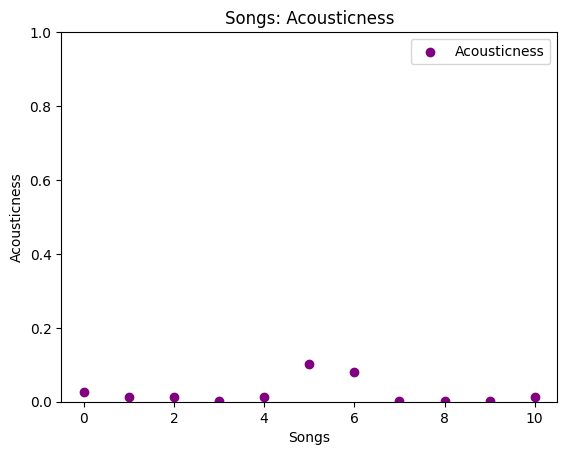

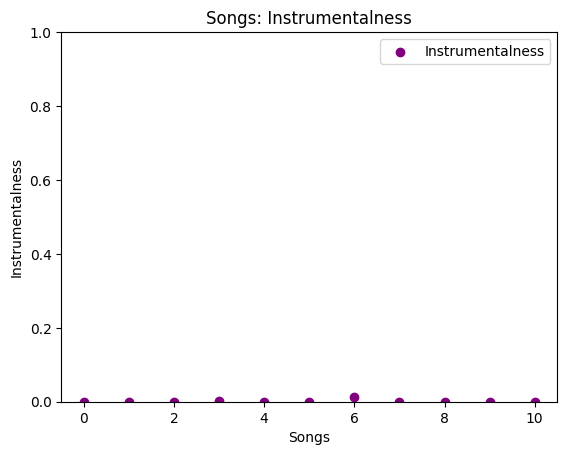

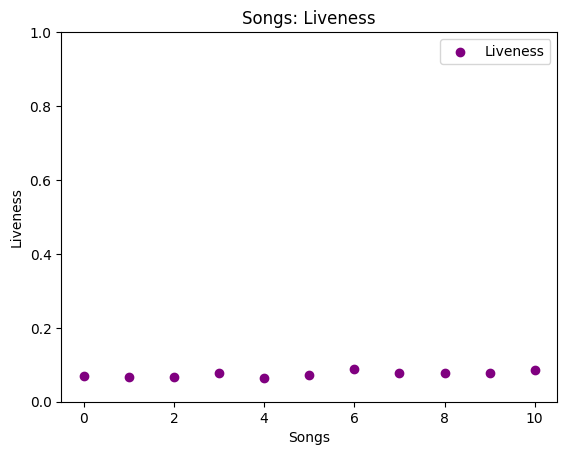

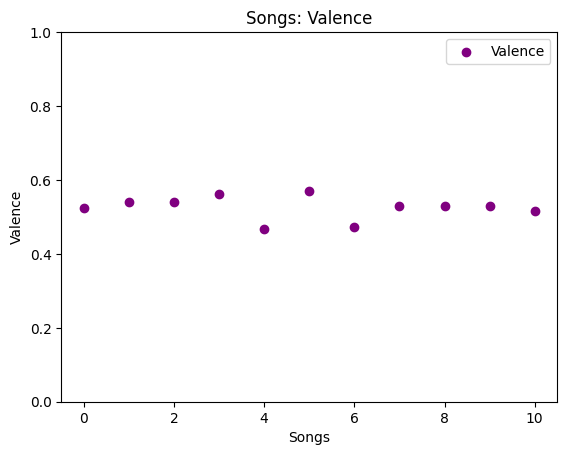

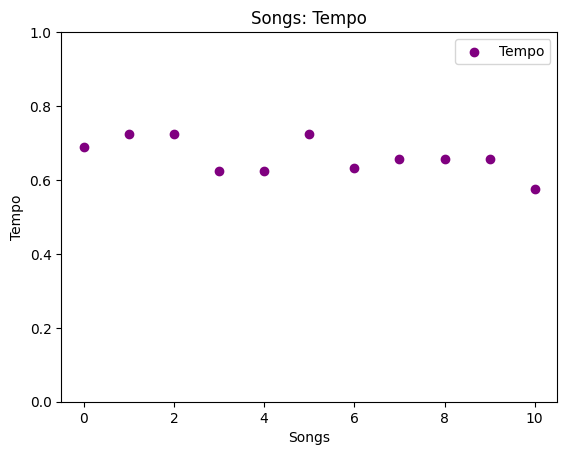

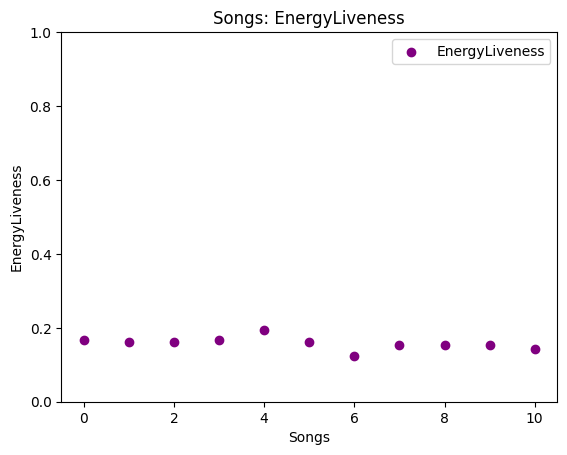

In [ ]:
song_indices = [4, 16580, 19974, 7519, 8294, 7997, 18013, 19796, 8350, 19796, 13995]  # Replace with your desired song indices
songs_data = df_normalized.iloc[song_indices]

danceability = songs_data['Danceability']
energy = songs_data['Energy']
loudness = songs_data['Loudness']
speechiness = songs_data['Speechiness']
acousticness = songs_data['Acousticness']
instrumentalness = songs_data['Instrumentalness']
liveness = songs_data['Liveness']
valence = songs_data['Valence']
tempo = songs_data['Tempo']
energyLiveness = songs_data['EnergyLiveness']

plt.scatter(range(len(danceability)), danceability, color='blue', label='Danceability')
plt.xlabel('Songs')
plt.ylabel('Danceability')
plt.title('Songs: Danceability')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.scatter(range(len(energy)), energy, color='green', label='Energy')
plt.xlabel('Songs')
plt.ylabel('Energy')
plt.title('Songs: Energy')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.scatter(range(len(loudness)), loudness, color='red', label='Loudness')
plt.xlabel('Songs')
plt.ylabel('Loudness')
plt.title('Songs: Loudness')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.scatter(range(len(speechiness)), speechiness, color='orange', label='Speechiness')
plt.xlabel('Songs')
plt.ylabel('Speechiness')
plt.title('Songs: Speechiness')
plt.legend()
plt.ylim(0,1)
plt.show()


plt.scatter(range(len(acousticness)), acousticness, color='purple', label='Acousticness')
plt.xlabel('Songs')
plt.ylabel('Acousticness')
plt.title('Songs: Acousticness')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.scatter(range(len(instrumentalness)), instrumentalness, color='purple', label='Instrumentalness')
plt.xlabel('Songs')
plt.ylabel('Instrumentalness')
plt.title('Songs: Instrumentalness')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.scatter(range(len(liveness)), liveness, color='purple', label='Liveness')
plt.xlabel('Songs')
plt.ylabel('Liveness')
plt.title('Songs: Liveness')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.scatter(range(len(valence)), valence, color='purple', label='Valence')
plt.xlabel('Songs')
plt.ylabel('Valence')
plt.title('Songs: Valence')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.scatter(range(len(tempo)), tempo, color='purple', label='Tempo')
plt.xlabel('Songs')
plt.ylabel('Tempo')
plt.title('Songs: Tempo')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.scatter(range(len(energyLiveness)), energyLiveness, color='purple', label='EnergyLiveness')
plt.xlabel('Songs')
plt.ylabel('EnergyLiveness')
plt.title('Songs: EnergyLiveness')
plt.legend()
plt.ylim(0,1)
plt.show()

Using KNN we got 10 songs that highly resemble our sample song "Clint Eastwood" by Gorillaz. We then plotted each song's (including the sample song) features: Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, and EnergyLiveness to show how close each song's features are to the sample song. The recommended songs are fairly close as the collection of plots almost make a straight line.

# **K-Means Algorithm:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

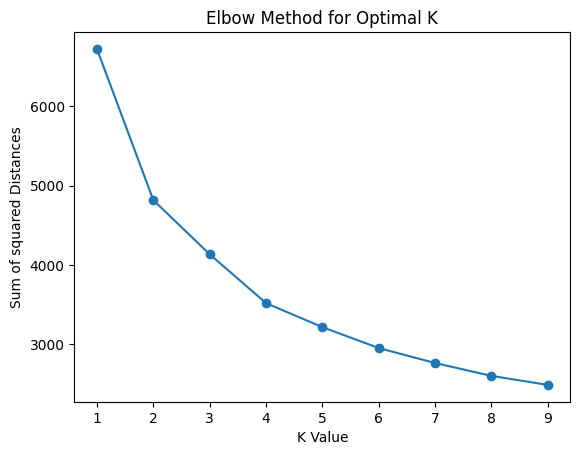

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sum_squared_dist = []
K = range(1,10)
for clusters in K:
  kmeans = KMeans(n_clusters = clusters)
  kmeans.fit(df_audio_features)
  sum_squared_dist.append(kmeans.inertia_)
plt.plot(K, sum_squared_dist, 'o-')
plt.xlabel('K Value')
plt.ylabel('Sum of squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()


Looking at the plot above, we can say that the elbow is at k = 4, therefore the optimal k for the dataset is 4.

In [ ]:

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_audio_features)
df_normalized['kmeans_cluster'] = kmeans.labels_
df_audio_features['kmeans_cluster'] = kmeans.labels_


def song_rec(track_name):
  try:
    track_i = df_normalized[df_normalized['Track'] == track_name].index[0]
  except IndexError:
    print('Invalid Track')
    return
  cluster = df_normalized.loc[track_i]['kmeans_cluster']
  same_cluster = (df_normalized['kmeans_cluster'] == cluster)
  df_filter = df_normalized[same_cluster]
  for num in range(5):
    rec = df_filter.sample()
    print(rec.iloc[0]['Track'])
song_rec('Clint Eastwood')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sometimes,IDontUnderstand
Beautiful Girl
Bir Ömür Yetmez
Selfless
Try a Little Tenderness


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

cluster_1 = (df_audio_features['kmeans_cluster'] == 0)
df_clust1 = df_audio_features[cluster_1]
cluster_2 = (df_audio_features['kmeans_cluster'] == 1)
df_clust2 = df_audio_features[cluster_2]
cluster_3 = (df_audio_features['kmeans_cluster'] == 2)
df_clust3 = df_audio_features[cluster_3]
cluster_4 = (df_audio_features['kmeans_cluster'] == 3)
df_clust4 = df_audio_features[cluster_4]

cluster1_means = []
for i in range(len(df_clust1.columns)):
  cluster1_means.append(df_clust1.iloc[i].mean())

cluster2_means = []
for i in range(len(df_clust2.columns)):
  cluster2_means.append(df_clust2.iloc[i].mean())

cluster3_means = []
for i in range(len(df_clust3.columns)):
  cluster3_means.append(df_clust3.iloc[i].mean())

cluster4_means = []
for i in range(len(df_clust4.columns)):
  cluster4_means.append(df_clust4.iloc[i].mean())


fig.add_trace(go.Scatterpolar(
      r=cluster1_means,
      theta=audio_features,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=cluster2_means,
      theta=audio_features,
      fill='toself',
      name='Cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=cluster3_means,
      theta=audio_features,
      fill='toself',
      name='Cluster 3'
))
fig.add_trace(go.Scatterpolar(
      r=cluster4_means,
      theta=audio_features,
      fill='toself',
      name='Cluster 4'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.8]
    )),
  showlegend=False
)

fig.show()

The above radar chart shows that cluster 4 is characterized by the highest values of each audio feature, cluster 1 is characterized by the lowest values of each audio feature, and cluster 2 and 3 is characterized by the middle values of each audio feature.

#Testing:

####Here, We will run KNN and K-means on two different playlists to show the algorithms in action and to compare the outputs of both algorithms

In [ ]:
import random
warnings.filterwarnings("ignore")
random.seed(100)
song1 = random.randint(10, 19000)
song2 = random.randint(10, 19000)
playlist1 = []
playlist1.append(df_normalized.iloc[song1])
playlist1.append(df_normalized.iloc[song2])

n1 = df_normalized.iloc[song1]
n2 = df_normalized.iloc[song2]

combined_songs = n1 + n2
combined_songs['Danceability'] = combined_songs['Danceability'] / 2
combined_songs['Energy'] = combined_songs['Energy'] / 2
combined_songs['Loudness'] = combined_songs['Loudness'] / 2
combined_songs['Speechiness'] = combined_songs['Speechiness'] / 2
combined_songs['Acousticness'] = combined_songs['Acousticness'] / 2
combined_songs['Instrumentalness'] = combined_songs['Instrumentalness'] / 2
combined_songs['Liveness'] = combined_songs['Liveness'] / 2
combined_songs['Valence'] = combined_songs['Valence'] / 2
combined_songs['Tempo'] = combined_songs['Tempo'] / 2
combined_songs['EnergyLiveness'] = combined_songs['EnergyLiveness'] / 2

sample_artist = n1['Artist']
sample_track = n1['Track']

sample_song_data = df_normalized[(df_normalized['Artist'] == sample_artist) & (df_normalized['Track'] == sample_track)]
sample_song_data['Danceability'] = combined_songs['Danceability']
sample_song_data['Energy'] = combined_songs['Energy']
sample_song_data['Loudness'] = combined_songs['Loudness']
sample_song_data['Speechiness'] = combined_songs['Speechiness']
sample_song_data['Acousticness'] = combined_songs['Acousticness']
sample_song_data['Instrumentalness'] = combined_songs['Instrumentalness']
sample_song_data['Liveness'] = combined_songs['Liveness']
sample_song_data['Valence'] = combined_songs['Valence']
sample_song_data['Tempo'] = combined_songs['Tempo']
sample_song_data['EnergyLiveness'] = combined_songs['EnergyLiveness']

if not sample_song_data.empty:
    sample_song_features = sample_song_data[audio_features].values

    k = 11
    knn_model = NearestNeighbors(n_neighbors=k)
    knn_model.fit(music_numerical)

    distances, indices = knn_model.kneighbors(sample_song_features)

    similar_songs = df_normalized.iloc[indices[0]]
    print(similar_songs)


                    Artist                                      Track  \
18664                Shiva                                 Non lo Sai   
14197          Kevin Gates                                      Power   
7754          Cássia Eller                                Malandragem   
11884                 Capo                                 GHETTOGIRL   
10572          John Legend                                 Minefields   
5284                Alonzo                         BALI - Bonus Track   
8242         Blake Shelton    Nobody But You (Duet with Gwen Stefani)   
13313           María José                               Me equivoqué   
15812  Of Monsters and Men                         King And Lionheart   
17688     Kelsea Ballerini  half of my hometown (feat. Kenny Chesney)   
2864         Kenny Chesney  half of my hometown (feat. Kenny Chesney)   

                             Album   Album_type  Danceability  Energy  \
18664                Milano Demons        album   

In [ ]:
print(n1['Track'] + ' Recommended songs')
song_rec(n1['Track'])
print('\n' + n2['Track'] + ' Recommended songs')
song_rec(n2['Track'])

2:00 AM Recommended songs
Don't Fly Away (PNAU Remix)
Down (feat. Gucci Mane)
Tabaco y Chanel - Re-Recorded
Stay Alive (Prod. SUGA of BTS)
Mientele

On My Own Recommended songs
Everytime We Touch - Hardwell & Maurice West Remix
Stir Fry
Transgender
Spin Bout U
Ribs
